In [1]:
import pandas as pd

from pycaret.regression import *

In [2]:
df = pd.read_csv('flights.csv')

In [3]:
df

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,4,19,5,DL,11433,13303,837,-3.0,0.0,1138,1.0,0,0
1,2013,4,19,5,DL,14869,12478,1705,0.0,0.0,2336,-8.0,0,0
2,2013,4,19,5,DL,14057,14869,600,-4.0,0.0,851,-15.0,0,0
3,2013,4,19,5,DL,15016,11433,1630,28.0,1.0,1903,24.0,1,0
4,2013,4,19,5,DL,11193,12892,1615,-6.0,0.0,1805,-11.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2719413,2013,10,19,6,DL,13204,14869,730,1.0,0.0,1013,-3.0,0,0
2719414,2013,10,19,6,DL,10397,13495,944,-2.0,0.0,1018,-3.0,0,0
2719415,2013,10,19,6,DL,10140,10397,1312,18.0,1.0,1807,9.0,0,0
2719416,2013,10,19,6,DL,10397,13244,1735,10.0,0.0,1757,7.0,0,0


In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.plot(kind='hist', figsize=(20,10));

### Sample

In [8]:
sample = df.sample(frac=0.1, random_state=123)

In [9]:
sample

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
1838432,2013,8,4,7,EV,12266,11298,715,0.0,0.0,831,-16.0,0,0
1509823,2013,7,21,7,OO,13930,13342,737,-1.0,0.0,820,-4.0,0,0
2496392,2013,10,12,6,US,14100,10721,1015,0.0,0.0,1142,-1.0,0,0
1462741,2013,7,30,2,WN,12892,11292,840,12.0,0.0,1155,6.0,0,0
942531,2013,6,15,6,B6,12478,10721,2255,-1.0,0.0,4,-5.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1337936,2013,7,31,3,AA,11298,10821,1635,-4.0,0.0,2035,-8.0,0,0
385714,2013,5,18,6,DL,10397,14027,1500,7.0,0.0,1654,-13.0,0,0
2465670,2013,10,6,7,WN,10721,10821,1005,0.0,0.0,1140,-15.0,0,0
520866,2013,5,24,5,B6,10721,13204,1429,0.0,0.0,1733,-2.0,0,0


### Setup the Experiment

In [10]:
exp = setup(data=sample, target= 'ArrDelay', session_id=123, train_size=0.7, normalize=True)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(271942, 14)"
4,Missing Values,True
5,Numeric Features,6
6,Categorical Features,6
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [11]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,7.796200,125.350400,11.182600,0.913500,0.750700,0.035600
1,Extreme Gradient Boosting,7.798600,127.385000,11.271100,0.912300,0.750400,0.035800
2,Ridge Regression,8.048000,129.566000,11.372800,0.910200,0.778300,0.030700
3,Linear Regression,8.048400,129.565400,11.372800,0.910200,0.778200,0.030800
4,Least Angle Regression,8.048400,129.566000,11.372800,0.910200,0.778200,0.030800
5,Bayesian Ridge,8.047400,129.565600,11.372800,0.910200,0.778400,0.030600
6,CatBoost Regressor,7.754800,131.497000,11.434900,0.910000,0.749500,0.034900
7,Random Sample Consensus,7.971100,130.823300,11.426200,0.909400,0.784000,0.019100
8,Orthogonal Matching Pursuit,8.137300,131.520200,11.458700,0.908900,0.782200,0.029900
9,Huber Regressor,7.950500,131.621400,11.460600,0.908900,0.785600,0.018000


### Gradient Boosting Regressor  Model

In [12]:
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,8.0942,130.8178,11.4376,0.9006,0.7697,0.0380
1,7.7479,131.6581,11.4742,0.9178,0.7299,0.0513
2,8.2359,145.5990,12.0664,0.9081,0.7629,-0.0149
3,7.7151,116.7266,10.8040,0.9021,0.7570,0.0245
4,7.7375,118.5631,10.8887,0.9205,0.7626,0.0185
5,7.6157,113.3701,10.6475,0.9045,0.7671,0.0400
6,7.5199,102.7616,10.1371,0.9203,0.7336,0.1209
7,7.7527,132.8800,11.5274,0.9223,0.7519,-0.0163
8,7.6785,122.9422,11.0879,0.9273,0.7417,0.0022
9,7.8645,138.1859,11.7553,0.9114,0.7308,0.0914


In [13]:
print(gbr)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


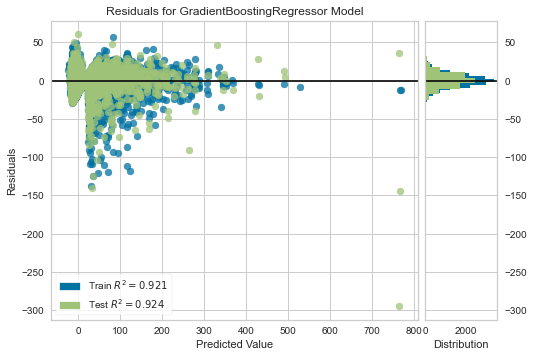

In [14]:
plot_model(gbr)

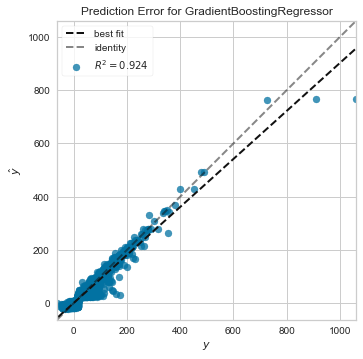

In [15]:
plot_model(gbr, plot = 'error')

In [16]:
evaluate_model(gbr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [17]:
predict_model(gbr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,7.8653,131.1105,11.4504,0.9237,0.772,0.0637


,DayofMonth,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,Month_10,Month_4,Month_5,...,Carrier_WN,Carrier_YV,ArrDel15_0,Cancelled_0,Year_month_1,Year_weekday_1,Year_is_month_end_0,Year_is_month_start_1,ArrDelay,Label
0,-0.658114,0.901753,1.335926,-1.252273,-0.289969,-0.503610,-0.970146,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,-5.0008
1,-1.111906,0.906415,0.502431,0.847185,0.696144,1.985664,1.459659,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,33.0,33.1563
2,-0.431218,0.370871,-1.560004,-0.902364,-0.399537,-0.503610,-0.909452,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,-3.0,-8.5386
3,0.703263,1.162864,0.100995,-1.273480,-0.180401,-0.503610,-1.162346,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,-2.9187
4,-0.885010,1.511901,-0.870307,-1.040207,-0.317361,-0.503610,-0.806271,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,-5.0,-5.3096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8064,-0.204322,0.095105,0.100995,-1.326496,-0.372145,-0.503610,-1.413217,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,-6.0,-8.1478
8065,0.589815,-0.178662,0.909858,-0.777244,-0.235185,-0.503610,-0.571585,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-3.4141
8066,0.589815,1.413984,0.308703,-0.679694,-0.289969,-0.503610,0.249814,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,7.0,-5.8033
8067,-1.679146,0.097103,-0.964175,-0.191941,-0.317361,-0.503610,0.083916,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,-4.0,-6.1114


In [18]:
test =  pd.read_csv("Test-Flights.csv")

In [19]:
test

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDel15,Cancelled
0,2013,6,10,1,YV,14107,10800,1415,2,0,1534,0,0
1,2013,10,14,1,DL,10397,13244,2030,-2,0,2055,0,0
2,2013,6,19,3,AS,13891,14747,615,-3,0,848,0,0
3,2013,10,13,7,EV,10693,12953,950,-7,0,1302,0,0
4,2013,9,13,5,WN,13232,12191,1930,10,0,2155,0,0
5,2013,7,1,1,WN,11292,13198,1020,20,1,1255,0,0
6,2013,8,16,5,WN,13204,10529,945,-2,0,1220,0,0
7,2013,6,26,3,EV,11618,11433,600,283,1,751,0,0
8,2013,10,23,3,OO,13851,12266,1203,-1,0,1327,0,0
9,2013,10,30,3,EV,13198,13930,600,-8,0,722,0,0


In [21]:
predictions = predict_model(gbr,data=test)

In [22]:
predictions

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDel15,Cancelled,Label
0,2013,6,10,1,YV,14107,10800,1415,2,0,1534,0,0,-1.6627
1,2013,10,14,1,DL,10397,13244,2030,-2,0,2055,0,0,-9.6387
2,2013,6,19,3,AS,13891,14747,615,-3,0,848,0,0,-6.2184
3,2013,10,13,7,EV,10693,12953,950,-7,0,1302,0,0,-11.1858
4,2013,9,13,5,WN,13232,12191,1930,10,0,2155,0,0,2.0552
5,2013,7,1,1,WN,11292,13198,1020,20,1,1255,0,0,5.1191
6,2013,8,16,5,WN,13204,10529,945,-2,0,1220,0,0,-6.9172
7,2013,6,26,3,EV,11618,11433,600,283,1,751,0,0,277.5750
8,2013,10,23,3,OO,13851,12266,1203,-1,0,1327,0,0,-5.6545
9,2013,10,30,3,EV,13198,13930,600,-8,0,722,0,0,-12.1177
